## LAB-04

In [1]:
#!pip install --upgrade numpy==1.24.3
#!pip install --upgrade pandas==2.2.0
#!pip install --upgrade scikit-learn==1.4.1.post1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aa2893\AppData\Local\Temp\ipykernel_13812\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df =  pd.read_csv('Lab1_output_insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   float64
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  Occupation_Artist    1338 non-null   bool   
 14  Occupation_Doctor    1338 non-null   bool   
 15  Occupation_Engineer  1338 non-null   b

##### Question-01:

In [5]:
# Categorizing charges and create the target variable y
df.loc[df['charges'] <= 4500, 'target'] = 1  # Low
df.loc[(df['charges'] > 4500) & (df['charges'] <= 10000), 'target'] = 2  # Affordable
df.loc[df['charges'] > 10000, 'target'] = 3  # High

# Dropping the 'target' column and renaming 'target' to 'charges'
df.drop(columns='charges', inplace=True)
df.rename(columns={'target': 'charges'}, inplace=True)

# Displaying the frequency of each label in charges
df['charges'].value_counts().sort_index()

charges
1.0    312
2.0    400
3.0    626
Name: count, dtype: int64

##### Question-02:

Machine Learning models that can be trained on this dataset using the current target column are Logistic Regression, Decision Tree Classifier and Random Forest Classifier.  
LinearRegression, Polynomial Regression, DecisionTreeRegression, RandomForestRegression, SGDRegressor are regression models.  
SGD Logistic Regressor is for binary classification not on multiclass classification. 

##### Question-03:

In [6]:
# Seperating features and target column
X = df.drop('charges', axis = 1)
y = df['charges']

# Printing information of DataFrame 'X'
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   avg_steps_per_day    1338 non-null   float64
 6   gym_frequency        1338 non-null   int64  
 7   time_spent_in_gym    1338 non-null   int64  
 8   region_northeast     1338 non-null   bool   
 9   region_northwest     1338 non-null   bool   
 10  region_southeast     1338 non-null   bool   
 11  region_southwest     1338 non-null   bool   
 12  Occupation_Artist    1338 non-null   bool   
 13  Occupation_Doctor    1338 non-null   bool   
 14  Occupation_Engineer  1338 non-null   bool   
 15  Occupation_Other     1338 non-null   b

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the feature sets
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating dataframes with the scaled features
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Computing and displaying the mean of the bmi column in the X_test dataframe to two decimal places
round(X_test['bmi'].mean(), 2)

0.39

##### Question-04:

In [8]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression model
lgstc_rgrsn = LogisticRegression(random_state=0, max_iter=200)
lgstc_rgrsn.fit(X_train, y_train)

# Displaying the training score with two digits after the decimal point
round(lgstc_rgrsn.score(X_train, y_train), 2)

0.8

##### Question-05:

In [9]:
# Displaying the test score with two digits after the decimal point
round(lgstc_rgrsn.score(X_test, y_test), 2)

0.76

##### Question-06

Training score is 0.80 and test score is 0.76.  
Since the difference between training and test scores, we can say that 'The model generalizes the unseen data pretty well.
'

##### Question-07:

In [10]:
from sklearn.metrics import confusion_matrix

# Predicting on training set
y_train_prediction = lgstc_rgrsn.predict(X_train)

# Printing confusion matrix for training dataset
print(confusion_matrix(y_train, y_train_prediction))

[[220  26   5]
 [ 12 225  77]
 [ 32  60 413]]


##### Question-09:

32 instances of class 3 are incorrectly predicted as class 1.  
60 instances of class 3 are incorrectly predicted as class 2.  
32 + 60 = 92  
Total number of misclassifications in class 3 are 92.  

##### Question-10:

Training dataset confusion matrix:  
220 26  5  
12  225 77  
32  60  413  

Misclassifications in class 1 are 31(26 + 5)   
Misclassifications in class 2 are 89(12 + 77)  
Misclassifications in class 3 are 92(60 + 32)  

The target class 3 has most number of miclassifications.]]

##### Question-11:

In [11]:
# Creating DataFrame for the new observation
new_obsrvn = pd.DataFrame({
    "age": [40],
    "sex": [1],
    "bmi": [28],
    "children": [2],
    "smoker": [0],
    "avg_steps_per_day": [7000],
    "gym_frequency": [1],
    "time_spent_in_gym": [2],
    "region_northeast": [0],
    "region_northwest": [0],
    "region_southeast": [0],
    "region_southwest": [1],
    "Occupation_Artist": [0],
    "Occupation_Doctor": [0],
    "Occupation_Engineer": [1],
    "Occupation_Other": [0],
    "Occupation_Teacher": [0]
})

# Scaling the new observation
new_obsrvn_scaled = scaler.transform(new_obsrvn)

# Creating dataframe from scaled observation
new_obsrvn_scaled = pd.DataFrame(new_obsrvn_scaled, columns=new_obsrvn.columns)

# Predicting using the model
new_obsrvn_prdn = lgstc_rgrsn.predict_proba(new_obsrvn_scaled)[0, 1]

# Displaying the prediction with four digits after the decimal point
round(new_obsrvn_prdn, 4)

0.0028

##### Question-12:

In [12]:
# Predicting using the model
print(lgstc_rgrsn.predict(new_obsrvn_scaled))

[3.]


##### Question-13:

Because of the class imbalance, it is recommended to use micro-averaging for evaluating the precision of the model for all classes.  
'Due to the class imbalance, it would be better for us to use micro-averaging.'


##### Question-14:

In [13]:
from sklearn.metrics import recall_score

# Calculating and printing recall score on the train dataframe rounded to two decimals
round(recall_score(y_train, lgstc_rgrsn.predict(X_train), average='macro'), 2)

0.8

##### Question-15:

In [14]:
from sklearn.metrics import precision_score

# Calculating and printing precision score on the train dataframe rounded to two decimals
round(precision_score(y_test, lgstc_rgrsn.predict(X_test), average='macro'), 2)

0.76

##### Question-16:

In [15]:
from sklearn.metrics import confusion_matrix

# Combining classes 1 and 2 into a positive label
y_new_train = y_train < 3

# Training the Logistic Regression model on converted binary target
lgstc_rgrsn_bnry = LogisticRegression(random_state=0, max_iter=1000)
lgstc_rgrsn_bnry.fit(X_train, y_new_train)

# Prediction on the train dataframe
y_train_prdn_bnry = lgstc_rgrsn_bnry.predict(X_train)

# Printing the confusion matrix
print(confusion_matrix(y_new_train, y_train_prdn_bnry))

[[408  97]
 [ 53 512]]


##### Question-18:

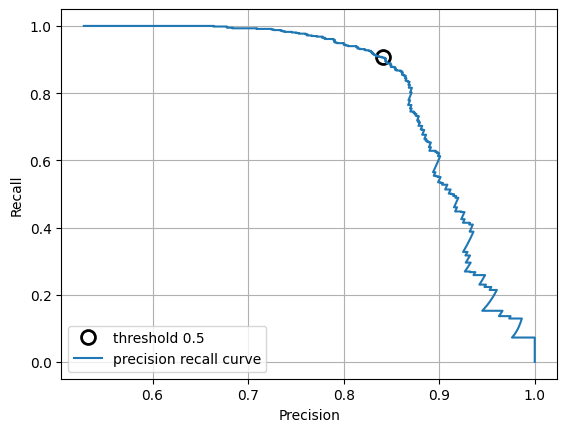

In [16]:
from sklearn.metrics import precision_recall_curve

# Calculating precision and recall
precision, recall, thresholds = precision_recall_curve(y_new_train, lgstc_rgrsn_bnry.predict_proba(X_train)[:, 1])

plt.plot(precision[np.argmin(np.abs(thresholds - 0.5))], recall[np.argmin(np.abs(thresholds - 0.5))], 'o', markersize=10,
         label="threshold 0.5", fillstyle="none", c='k', mew=2)


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [17]:
# Calculating precision at the threshold closest to 0.5
prcsn_clst_to_05 = precision[np.argmin(np.abs(thresholds - 0.5))]

#Displaying precision rounded to 2 decimal places
round(prcsn_clst_to_05, 2)

0.84

##### Question-19:

In [18]:
thrsld_at_rcl_95 = thresholds[np.argmin(np.abs(recall - 0.95))]
thrsld_at_rcl_95

0.369464484787218

##### Question-20:

In [19]:
from sklearn.metrics import confusion_matrix

# Assigning positive (1) or negative (0) labels based on the threshold value determined in the previous question
y_pred_threshold = np.where(lgstc_rgrsn_bnry.predict_proba(X_train)[:, 1] >= thrsld_at_rcl_95, 1, 0)

# Creating the confusion matrix
confusion_matrix_threshold = confusion_matrix(y_new_train, y_pred_threshold)

confusion_matrix_threshold

array([[363, 142],
       [ 28, 537]], dtype=int64)

##### Question-21:

In [20]:
y_train.value_counts().sort_index()

charges
1.0    251
2.0    314
3.0    505
Name: count, dtype: int64

In [21]:
# Define a function named entropy that takes three arguments: a, b, and c
def entropy(a, b, c):
    total = a + b + c  # Calculate the total count of occurrences
    if a == 0 or b == 0 or c == 0:  # If any of the counts is zero, entropy is 0
        return 0
    else:
        # Calculate the entropy using the formula: -p(a) * log2(p(a)) - p(b) * log2(p(b)) - p(c) * log2(p(c))
        # where p(x) is the probability of x occurring, calculated as count of x / total count
        return -(a/total) * np.log2(a/total) - (b/total) * np.log2(b/total) - (c/total) * np.log2(c/total)

# Round the result of the entropy function to 2 decimal places
round(entropy(251, 314, 505), 2)

1.52

##### Question-22:

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train a DecisionTreeClassifier
dcsn_tr_clasfr = DecisionTreeClassifier(random_state=0)
dcsn_tr_clasfr.fit(X_train, y_train)

# Getting the depth of the decision tree
dcsn_tr_clasfr.get_depth()

15

##### Question-23:

In [23]:
# Print training and test scores
print("Training score:", dcsn_tr_clasfr.score(X_train, y_train))
print("Test score:", dcsn_tr_clasfr.score(X_test, y_test))

Training score: 1.0
Test score: 0.7873134328358209


The model overfits the data as there is a significant gap between train and test scores.  
The training score of this model should be 1 or very close to 1 because there is no parameter to specify early stopping conditions.

##### Question-24:

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree model with max_depth=1
dcsn_tr_clasfr_md_1 = DecisionTreeClassifier(max_depth=1, random_state=0)

# Train the model
dcsn_tr_clasfr_md_1.fit(X_train, y_train)

# Calculate training and test scores with new classifier
trn_score_md1 = dcsn_tr_clasfr_md_1.score(X_train, y_train)
tst_score_md1 = dcsn_tr_clasfr_md_1.score(X_test, y_test)

# Calculating and displaying the score gap with two decimal places
print(round(abs(trn_score_md1 - tst_score_md1), 2))
print(trn_score_md1)
print(tst_score_md1)

0.02
0.5869158878504673
0.5708955223880597


##### Question-25:

In [25]:
best_max_depth = 0
best_train_score = 0
best_test_score = 0
smlst_gap = float('inf')

for max_depth in range(1, 11):
    # Creating a DecisionTreeClassifier model with max_depth
    dcsn_tr_clasfr_md1to11 = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    
    # Training the model
    dcsn_tr_clasfr_md1to11.fit(X_train, y_train)
    
    # Calculating training and test scores
    train_score = dcsn_tr_clasfr_md1to11.score(X_train, y_train)
    test_score = dcsn_tr_clasfr_md1to11.score(X_test, y_test)
    
    # Calculate the gap between train and test scores
    gap = abs(train_score - test_score)
    
    # Check if both train and test scores are above 0.8
    if train_score > 0.8 and test_score > 0.8:
        # Check if this model has the smallest gap
        if gap < smlst_gap:
            best_max_depth = max_depth
            best_train_score = train_score
            best_test_score = test_score
            smlst_gap = gap

print(best_max_depth)

3


##### Question-26:

In [26]:
from sklearn.metrics import precision_score

# Creating DecisionTreeClassifier with the best max_depth
dcsn_tr_clsfr_bst = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)

# Training the model
dcsn_tr_clsfr_bst.fit(X_train, y_train)

# Predict on the test set
y_train_prdtn = dcsn_tr_clsfr_bst.predict(X_train)

# Calculating and displaying macro-precision score
round(precision_score(y_train, y_train_prdtn, average='macro'), 2)

0.82

##### Question-27:

In [27]:
# Predict on the test set
y_tst_prdtn = dcsn_tr_clsfr_bst.predict(X_test)

# Calculating and displaying macro-precision score
round(precision_score(y_test, y_tst_prdtn, average='macro'), 2)

0.8

##### Question-28:

In [28]:
from sklearn.metrics import confusion_matrix

# Printing Confusion matrix on test data
print(confusion_matrix(y_test, y_tst_prdtn))

[[54  7  0]
 [14 69  3]
 [ 9 20 92]]


Actual label "1" was predicted as "1" 54 times, as "2" 7 times, and as "3" 0 times.  
Actual label "2" was predicted as "1" 14 times, as "2" 69 times, and as "3" 3 times  .
Actual label "3" was predicted as "1" 9 times, as "2" 20 times, and as "3" 92 time  

None of the instances with actual label 3 are predicted as label 1. (predicted as 1 9 times) - Incorrect  
Using the decision tree model, instances with label 2 have the highest number of wrong predictions. - Incorrect as max(7+0, 14+3, 9+20) is class 3 not 2.  
Instances with label 1 are either predicted as label 1 or label 3. - Incorrect as they are predicted as 1 or 2 not as 3.  
The actual label of instance predicted with label 1 is either 1 or 2. - Incorrect as the actual labels of predicted 1 are 1, 2, and 3.
.
2.

##### Question-29:

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Define lists to store train and test accuracies
rfc_trn_acry = []
rfc_tst_acry = []
rfc_index = []

# Iterate over hyperparameter values
for max_depth in [1, 2]:
    for max_samples in [0.2, 0.5]:
        for max_features in [0.2, 0.5]:
            # Create and train the RandomForestClassifier
            rndm_frst_clsfr = RandomForestClassifier(random_state=0, 
                                                     max_depth=max_depth, 
                                                     max_samples=max_samples, 
                                                     max_features=max_features)
            rndm_frst_clsfr.fit(X_train, y_train)
            
            # Calculate train and test accuracies
            trn_acry = rndm_frst_clsfr.score(X_train, y_train)
            tst_acry = rndm_frst_clsfr.score(X_test, y_test)
            
            # Append accuracies and hyperparameters to lists
            rfc_trn_acry.append(trn_acry)
            rfc_tst_acry.append(tst_acry)
            rfc_index.append((max_depth, max_samples, max_features))

# Convert lists to numpy arrays
rfc_trn_acry = np.array(rfc_trn_acry)
rfc_tst_acry = np.array(rfc_tst_acry)

# Calculate the difference between train and test accuracies
accuracy_diff = np.abs(rfc_trn_acry - rfc_tst_acry)

# Get the index of the minimum difference
best_index = np.argmin(accuracy_diff)

# Get the best hyperparameters
best_params = rfc_index[best_index]
best_max_depth, best_max_samples, best_max_features = best_params

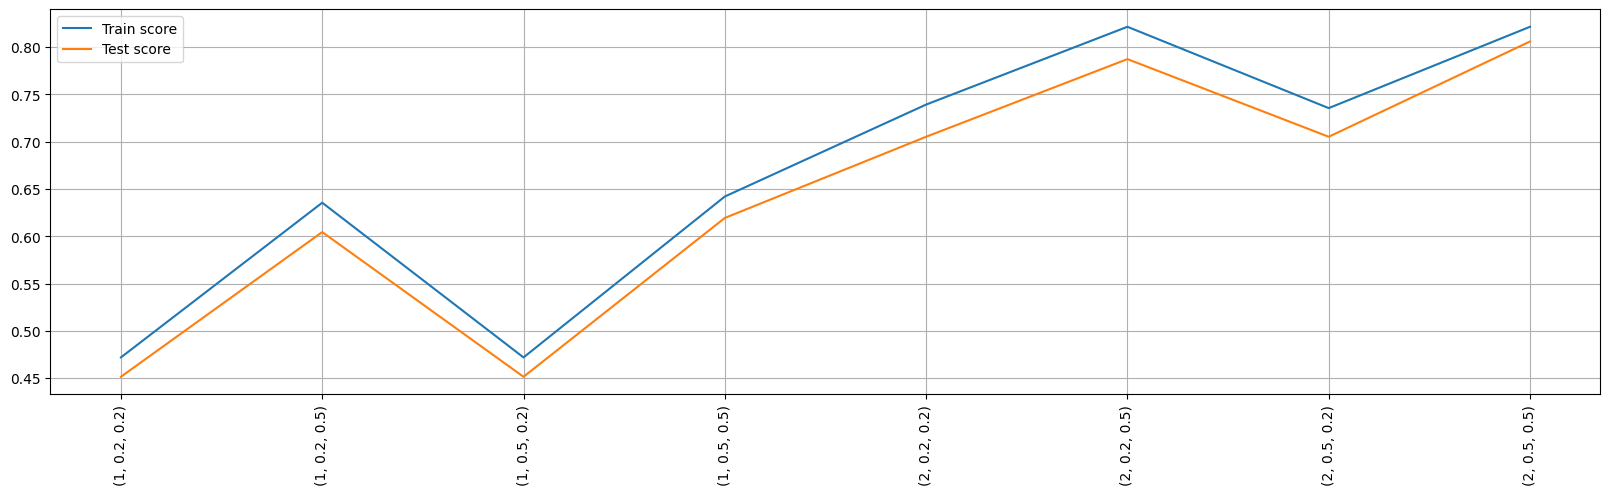

(2, 0.5, 0.5)
0.8214953271028037
0.8059701492537313


In [30]:
# Visualize the results
%matplotlib inline
plt.subplots(figsize=(20,5))
plt.plot(range(len(rfc_index)), rfc_trn_acry, label='Train score')
plt.plot(range(len(rfc_index)), rfc_tst_acry, label='Test score')
plt.xticks(range(len(rfc_index)), rfc_index, rotation=90)
plt.legend()
plt.grid()
plt.show()

print(best_params)
print(rfc_trn_acry[best_index])
print(rfc_tst_acry[best_index])

##### Question-30:

In [31]:
# Define and train the RandomForestClassifier with the best hyperparameters
bst_rndm_frst_clsfr = RandomForestClassifier(max_depth=2, 
                                             max_samples=0.5, 
                                             max_features=0.5, 
                                             random_state=0)
bst_rndm_frst_clsfr.fit(X_train, y_train)

# Calculating the training score
print(round(bst_rndm_frst_clsfr.score(X_train, y_train), 2))

0.82


##### Question-31

In [32]:
# Calculating the training score
print(round(bst_rndm_frst_clsfr.score(X_test, y_test), 2))

0.81


##### Question-32

In [33]:
# Get the indices of the top 3 features
tp_3_indcs = bst_rndm_frst_clsfr.feature_importances_.argsort()[-3:][::-1]

# Get the names of the top 3 features
top_3_features = X_train.columns[tp_3_indcs]
top_3_features

Index(['age', 'smoker', 'avg_steps_per_day'], dtype='object')